<a href="https://colab.research.google.com/github/nadhifazlfa/strukturdata-week13-Djikstra/blob/main/strukturdata_week13_Djikstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx matplotlib

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Implementasi algoritma Dijkstra
def dijkstra_with_paths(graph, start):
    # inisialisasi jarak awal dari start ke semua simpul (∞)
    distances = {node: float('inf') for node in graph}
    # inisialisasi jarak awal = 0 → karena jarak simpul awal (start) ke dirinya sendiri
    distances[start] = 0
    # inisialisasi dictionary untuk menyimpan jejak simpul sebelumnya yang telah dilalui
    previous = {node: None for node in graph}
    # inisialisasi priority queue (heap) yang berisi pasangan (jarak, simpul)
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        # memeriksa semua tetangga dari simpul saat ini
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            # Jika ditemukan jalur yang lebih pendek ke tetangga
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous    # kembalikan jarak minimum dan jalur terpendek

In [ ]:
def get_path(previous, target):
    path = []
    while target is not None:
       path.insert(0, target)
       target = previous[target]
    return path

In [ ]:
def visualize_graph(graph, path=None):
    # inisialisasi G sebagai graf berarah kosong
    G = nx.DiGraph()

    # menambahkan simpul dan sisi ke dalam graf G dari dictionary 'graph'
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    # menentukan posisi simpul secara otomatis menggunakan spring_layout
    pos = nx.spring_layout(G)
    # mengambil label bobot untuk setiap sisi
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # membuat kanvas gambar berukuran 8 x 6
    plt.figure(figsize=(8, 6))
    # menggambar graf dengan warna node biru muda, label tebal, dan tanda panah
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrows= True)
    # menampilkan label bobot pada sisi
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # kondisi jika jalur terpendek dengan panjang > 1
    if path and len(path) > 1:
        # buat daftar pasangan sisi dalam jalur (dari simpul ke simpul berikutnya)
        path_edges = list(zip(path, path[1:]))
        # gambar ulang sisi tersebut sengan warna merah dan garis tebal
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Visualisasi Graph dan Jalur Terpendeknya")
    plt.axis('off')   # sumbu disembunyikan
    plt.show()        # menampilkan hasil visualisasi

Jarak dari A ke Z: 14
Jalur: A → B → D → E → Z


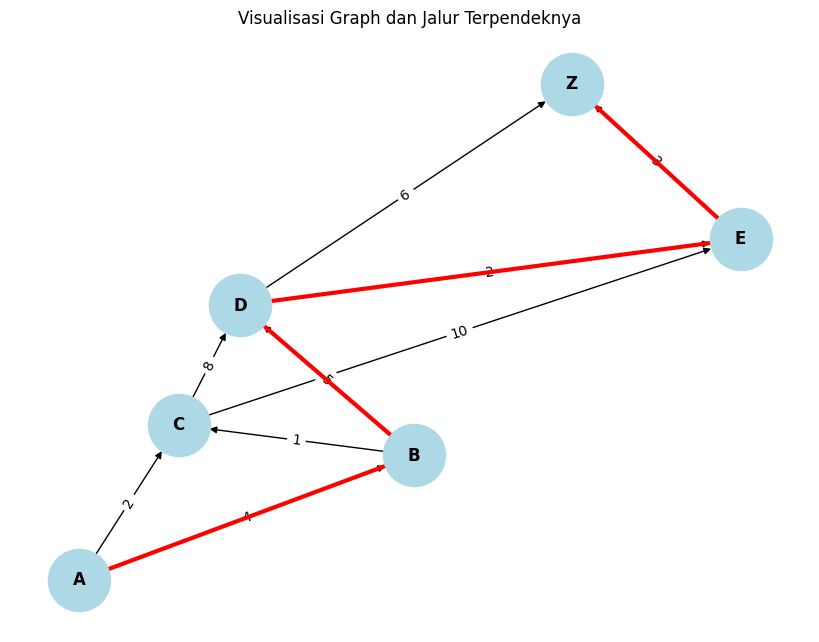

In [ ]:
# definisi graf berbobot dalam bentuk adjacency list
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

start_node = 'A'    # simpul awal
end_node = 'Z'      # simpul tujuan

# panggil fungsi dijkstra_with_paths untuk menjalankan algoritma
distances, previous = dijkstra_with_paths(graph, start_node)

# rekonstruksi jalur terpendek dari start_node ke end_node
shortest_path = get_path(previous, end_node)

# cetak hasil jarak dan jalur
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' → '.join(shortest_path)}")

# visualisasi graf + jalur terpendek
visualize_graph(graph, path=shortest_path)